In [1]:
using Plots, ValidatedNumerics, Interact, ForwardDiff, LaTeXStrings
gr()

Plots.GRBackend()


# Standard Newton method for finding root of function 

The standard **Newton method** for roots of $f: \mathbb{R} \to \mathbb{R}$ is as follows:

> From an initial guess $x_0$, take the tangent line through $(x_0, f(x_0))$ with slope $f'(x_0)$ and intersect it with the $x$-axis to get a new guess $x_1$. Iterate.

The line through $(x_0, y_0)$ with slope $m$ is 

$$ y - y_0 = m \cdot (x - x_0)$$

This intersects the $x$-axis at

$$x_1 := x_0 - \frac{y_0}{m}$$

We can calculate the derivative using the `ForwardDiff` package:

In [2]:
using ForwardDiff

f(x) = x^2 - 2
f′ = x -> ForwardDiff.derivative(f, x)   # \prime<TAB>  for ' symbol

f′(3.0)

6.0

In [3]:
straight(x0, y0, x, m) = y0 + m * (x - x0)

straight (generic function with 1 method)

In [4]:
function standard_Newton(f, xx, x00, ymin=-10, ymax=10)
    
    f′ = x->ForwardDiff.derivative(f,x)

    @manipulate for n in collect(0:10)
        x0 = x00
    
        
        p = plot(f, xx, lw=3, ylim=(ymin, ymax), legend=:false)
        
        scatter!([x0], [0], c="green", ann=(x0, -5, "x_0", 10))


        hline!([0.0], c="magenta", lw=3, ls=:dash)


        for i in 1:n
            
            plot!([x0, x0], [0, f(x0)], c="blue", ls=:dash)
            scatter!([x0], [f(x0)], c="red")
            m = f′(x0)

            plot!(xx, [straight(x0, f(x0), x, m) for x in xx], c="gray", alpha=0.5)

            x1 = x0 - f(x0) / m
            scatter!([x1], [0], c="green", ann=(x1, -5, "x_$i"))

            if i < n
                scatter!([x1, x1], [0, f(x1)], c="green")
            end

            x0 = x1
        end
        
        p

    end

end


standard_Newton (generic function with 3 methods)

In [5]:
xx = -1:0.01:10
f(x) = x^2 - 2
x0 = 8

standard_Newton(x->f(x), xx, x0, -10, 70)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(0, nactions=0),"n",0,"0",Interact.OptionDict(Any["0","1","2","3","4","5","6","7","8","9","10"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("5",5),Pair{Any,Any}("7",7),Pair{Any,Any}("8",8),Pair{Any,Any}("10",10),Pair{Any,Any}("0",0),Pair{Any,Any}("9",9)…)),Any[],Any[])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 0 
 
 
 25 
 
 
 50 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 53.305,342.088 53.7697,342.182 54.2344,342.276 54.6991,342.369 55.1638,342.461 55.6284,342.552 56.0931,342.642 56.5578,342.731 57.0225,342.819 57.4872,342.906 
 57.9519,342.993 58.4166,343.078 58.8813,343.162 59.346,343.246 59.8107,343.328 60.2754,343.409 60.7401,343.49 61.2048,343.569 61.6695,343.648 62.1342,343.726 
 62.5989,343.802 63.0636,343.878 63.5283,343.953 63.993,344.027 64.4577,344.099 64.9224,344.171 65.3871,344.242 65.8518,344.312 66.3165,344.381 66.7812,344.45 
 67.2459,344.517 67.7106,344.583 68.1753,344.648 68.64,344.712 69.1047,344.776 69.5694,344.838 70.0341,344.9 70.4988,344.96 70.9635,345.02 71.4282,345.078 
 71.8929,345.136 72.3576,345.193 72.8223,345.248 73.287,345.303 73.7517,345.357 74.2164,345.41 74.6811,345.462 75.1458,345.513 75.6105,345.563 76.0752,345.612 
 76.5399,345.66 77.0046,345.707 77.4693,345.753 77.934,345.798 78.3987,345.843 78.8634,345.886 79.3281,345.928 79.7927,345.97 80.2574,346.01 80.7221,346.05 
 81.1868,346.088 81.6515,346.126 82.1162,346.163 82.5809,346.198 83.0456,346.233 83.5103,346.267 83.975,346.3 84.4397,346.332 84.9044,346.363 85.3691,346.393 
 85.8338,346.422 86.2985,346.45 86.7632,346.477 87.2279,346.503 87.6926,346.528 88.1573,346.553 88.622,346.576 89.0867,346.598 89.5514,346.62 90.0161,346.64 
 90.4808,346.66 90.9455,346.678 91.4102,346.696 91.8749,346.713 92.3396,346.728 92.8043,346.743 93.269,346.757 93.7337,346.77 94.1984,346.782 94.6631,346.793 
 95.1278,346.803 95.5925,346.812 96.0572,346.82 96.5219,346.827 96.9866,346.833 97.4513,346.838 97.916,346.843 98.3807,346.846 98.8454,346.848 99.3101,346.85 
 99.7748,346.85 100.239,346.85 100.704,346.848 101.169,346.846 101.634,346.843 102.098,346.838 102.563,346.833 103.028,346.827 103.492,346.82 103.957,346.812 
 104.422,346.803 104.886,346.793 105.351,346.782 105.816,346.77 106.281,346.757 106.745,346.743 107.21,346.728 107.675,346.713 108.139,346.696 108.604,346.678 
 109.069,346.66 109.533,346.64 109.998,346.62 110.463,346.598 110.928,346.576 111.392,346.553 111.857,346.528 112.322,346.503 112.786,346.477 113.251,346.45 
 113.716,346.422 114.18,346.393 114.645,346.363 115.11,346.332 115.574,346.3 116.039,346.267 116.504,346.233 116.969,346.198 117.433,346.163 117.898,346.126 
 118.363,346.088 118.827,346.05 119.292,346.01 119.757,345.97 120.221,345.928 120.686,345.886 121.151,345.843 121.616,345.798 122.08,345.753 122.545,345.707 
 123.01,345.66 123.474,345.612 123.939,345.563 124.404,345.513 124.868,345.462 125.333,345.41 125.798,345.357 126.263,345.303 126.727,345.248 127.192,345.193 
 127.657,345.136 128.121,345.078 128.586,345.02 129.051,344.96 129.515,344.9 129.98,344.838 130.445,344.776 130.91,344.712 131.374,344.648 131.839,344.583 
 132.304,344.517 132.768,344.45 133.233,344.381 133.698,344.312 134.162,344.242 134.627,344.171 135.092,344.099 135.557,344.027 136.021,343.953 136.486,343.878 
 136.951,343.802 137.415,343.726 137.88,343.648 138.345,343.569 138.809,343.49 139.274,343.409 139.739,343.328 140.203,343.246 140.668,343.162 141.133,343.078 
 141.598,342.993 142.062,342.906 142.527,342.819 142.992,342.731 143.456,342.642 143.921,342.552 144.386,342.461 144.85,342.369 145.315,342.276 145.78,342.182 
 146.245,342.088 146.709,341.992 147.174,341.895 147.639,341.798 148.103,341.699 148.568,341.6 149.033,341.499 149.497,341.398 149.962,341.295 150.427,341.192 
 150.892,341.088 151.356,340.982 151.821,340.876 152.286,340.769 152.75,340.661 153.215,340.552 153.68,340.442 154.144,340.331 154.609,340.219 155.074,340.106 
 155.539,339.992 156.003,339.877 156.468,339.762 156.933,339.645 157.397,339.527 157.862,339.409 158.327,339.289 158.791,339.169 159.256,339.047 159.721,338.925 
 160.186,338.801 160.65,338.677 161.115,338.552 161.58,338.426 162.044,3

However, Newton's method can be unstable: changing the initial condition a bit can lead to complicated behaviour and a different root. (This is especially true [in the complex plane](https://en.wikipedia.org/wiki/Newton_fractal).)

In [19]:
xx = -3:0.01:3

f(x) = x^3 - x

x0 = -0.4
standard_Newton(f, xx, x0, -5, 5)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(0, nactions=0),"n",0,"0",Interact.OptionDict(Any["0","1","2","3","4","5","6","7","8","9","10"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("5",5),Pair{Any,Any}("7",7),Pair{Any,Any}("8",8),Pair{Any,Any}("10",10),Pair{Any,Any}("0",0),Pair{Any,Any}("9",9)…)),Any[],Any[])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 -5.0 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 70.1049,1108.88 70.9305,1099.01 71.7561,1089.2 72.5817,1079.47 73.4072,1069.8 74.2328,1060.2 75.0584,1050.67 75.884,1041.2 76.7095,1031.8 77.5351,1022.47 
 78.3607,1013.21 79.1863,1004.01 80.0118,994.876 80.8374,985.809 81.663,976.807 82.4886,967.871 83.3141,959 84.1397,950.195 84.9653,941.453 85.7909,932.777 
 86.6165,924.164 87.442,915.616 88.2676,907.131 89.0932,898.71 89.9188,890.352 90.7443,882.057 91.5699,873.825 92.3955,865.656 93.2211,857.549 94.0466,849.505 
 94.8722,841.522 95.6978,833.601 96.5234,825.742 97.3489,817.943 98.1745,810.206 99.0001,802.53 99.8257,794.914 100.651,787.359 101.477,779.863 102.302,772.428 
 103.128,765.052 103.954,757.736 104.779,750.479 105.605,743.281 106.43,736.142 107.256,729.061 108.081,722.038 108.907,715.074 109.733,708.167 110.558,701.318 
 111.384,694.526 112.209,687.792 113.035,681.114 113.86,674.494 114.686,667.929 115.512,661.421 116.337,654.969 117.163,648.573 117.988,642.232 118.814,635.946 
 119.639,629.716 120.465,623.54 121.291,617.419 122.116,611.353 122.942,605.341 123.767,599.382 124.593,593.478 125.419,587.627 126.244,581.829 127.07,576.084 
 127.895,570.392 128.721,564.752 129.546,559.165 130.372,553.63 131.198,548.147 132.023,542.716 132.849,537.336 133.674,532.007 134.5,526.729 135.325,521.502 
 136.151,516.326 136.977,511.2 137.802,506.123 138.628,501.097 139.453,496.12 140.279,491.193 141.104,486.315 141.93,481.486 142.756,476.705 143.581,471.973 
 144.407,467.289 145.232,462.653 146.058,458.065 146.884,453.525 147.709,449.032 148.535,444.585 149.36,440.186 150.186,435.834 151.011,431.527 151.837,427.267 
 152.663,423.053 153.488,418.885 154.314,414.762 155.139,410.685 155.965,406.652 156.79,402.664 157.616,398.721 158.442,394.822 159.267,390.968 160.093,387.157 
 160.918,383.39 161.744,379.666 162.569,375.986 163.395,372.348 164.221,368.753 165.046,365.201 165.872,361.691 166.697,358.223 167.523,354.797 168.348,351.413 
 169.174,348.07 170,344.768 170.825,341.507 171.651,338.286 172.476,335.107 173.302,331.967 174.128,328.867 174.953,325.808 175.779,322.787 176.604,319.806 
 177.43,316.865 178.255,313.962 179.081,311.097 179.907,308.271 180.732,305.483 181.558,302.734 182.383,300.022 183.209,297.347 184.034,294.71 184.86,292.109 
 185.686,289.546 186.511,287.019 187.337,284.528 188.162,282.074 188.988,279.655 189.813,277.272 190.639,274.925 191.465,272.613 192.29,270.335 193.116,268.093 
 193.941,265.885 194.767,263.711 195.593,261.571 196.418,259.466 197.244,257.393 198.069,255.354 198.895,253.349 199.72,251.376 200.546,249.436 201.372,247.528 
 202.197,245.653 203.023,243.809 203.848,241.998 204.674,240.218 205.499,238.469 206.325,236.751 207.151,235.065 207.976,233.408 208.802,231.783 209.627,230.187 
 210.453,228.621 211.278,227.086 212.104,225.579 212.93,224.102 213.755,222.654 214.581,221.235 215.406,219.844 216.232,218.481 217.057,217.147 217.883,215.841 
 218.709,214.562 219.534,213.311 220.36,212.087 221.185,210.89 222.011,209.719 222.837,208.575 223.662,207.458 224.488,206.366 225.313,205.301 226.139,204.261 
 226.964,203.246 227.79,202.256 228.616,201.292 229.441,200.352 230.267,199.436 231.092,198.545 231.918,197.678 232.743,196.834 233.569,196.015 234.395,195.218 
 235.22,194.444 236.046,193.694 236.871,192.966 237.697,192.26 238.522,191.577 239.348,190.915 240.174,190.276 240.999,189.657 241.825,189.06 242.65,188.484 
 243.476,187.929 244.301,187.394 245.127,186.88 245.953,186.386 246.778,185.912 247.604,185.457 248.429,185.022 249.255,184.606 250.081,184.209 250.906,183.831 
 251.732,183.471 252.557,183.13 253.383,182.806 254.208,182.501 255.034,182.213 255.86,181.942 256.685,181.689 257.511,181.452 258.336,181.233 259.162,181.029 
 259.987,180.842 260.

In [20]:
# Same f !
x0 = -0.45
standard_Newton(f, -12:0.01:12, x0, -100, 1100)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(0, nactions=0),"n",0,"0",Interact.OptionDict(Any["0","1","2","3","4","5","6","7","8","9","10"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("5",5),Pair{Any,Any}("7",7),Pair{Any,Any}("8",8),Pair{Any,Any}("10",10),Pair{Any,Any}("0",0),Pair{Any,Any}("9",9)…)),Any[],Any[])

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
 0 
 
 
 500 
 
 
 1000 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 70.1049,898.052 70.3113,896.685 70.5177,895.32 70.7241,893.957 70.9305,892.596 71.1369,891.238 71.3433,889.882 71.5497,888.528 71.7561,887.177 71.9625,885.828 
 72.1689,884.481 72.3753,883.137 72.5817,881.794 72.7881,880.454 72.9944,879.116 73.2008,877.781 73.4072,876.448 73.6136,875.117 73.82,873.788 74.0264,872.461 
 74.2328,871.137 74.4392,869.815 74.6456,868.495 74.852,867.178 75.0584,865.862 75.2648,864.549 75.4712,863.239 75.6776,861.93 75.884,860.624 76.0904,859.32 
 76.2967,858.018 76.5031,856.718 76.7095,855.421 76.9159,854.125 77.1223,852.833 77.3287,851.542 77.5351,850.253 77.7415,848.967 77.9479,847.683 78.1543,846.401 
 78.3607,845.121 78.5671,843.844 78.7735,842.569 78.9799,841.296 79.1863,840.025 79.3927,838.756 79.5991,837.49 79.8054,836.225 80.0118,834.963 80.2182,833.704 
 80.4246,832.446 80.631,831.19 80.8374,829.937 81.0438,828.686 81.2502,827.437 81.4566,826.19 81.663,824.946 81.8694,823.704 82.0758,822.463 82.2822,821.225 
 82.4886,819.99 82.695,818.756 82.9014,817.524 83.1078,816.295 83.3141,815.068 83.5205,813.843 83.7269,812.62 83.9333,811.399 84.1397,810.181 84.3461,808.965 
 84.5525,807.75 84.7589,806.538 84.9653,805.328 85.1717,804.121 85.3781,802.915 85.5845,801.712 85.7909,800.51 85.9973,799.311 86.2037,798.114 86.4101,796.919 
 86.6165,795.727 86.8228,794.536 87.0292,793.347 87.2356,792.161 87.442,790.977 87.6484,789.795 87.8548,788.615 88.0612,787.437 88.2676,786.261 88.474,785.088 
 88.6804,783.916 88.8868,782.747 89.0932,781.579 89.2996,780.414 89.506,779.251 89.7124,778.09 89.9188,776.931 90.1251,775.775 90.3315,774.62 90.5379,773.467 
 90.7443,772.317 90.9507,771.169 91.1571,770.022 91.3635,768.878 91.5699,767.736 91.7763,766.596 91.9827,765.458 92.1891,764.322 92.3955,763.189 92.6019,762.057 
 92.8083,760.928 93.0147,759.8 93.2211,758.675 93.4275,757.551 93.6338,756.43 93.8402,755.311 94.0466,754.194 94.253,753.079 94.4594,751.966 94.6658,750.855 
 94.8722,749.746 95.0786,748.639 95.285,747.534 95.4914,746.431 95.6978,745.331 95.9042,744.232 96.1106,743.135 96.317,742.041 96.5234,740.948 96.7298,739.858 
 96.9362,738.77 97.1425,737.683 97.3489,736.599 97.5553,735.517 97.7617,734.436 97.9681,733.358 98.1745,732.282 98.3809,731.208 98.5873,730.136 98.7937,729.065 
 99.0001,727.997 99.2065,726.931 99.4129,725.867 99.6193,724.805 99.8257,723.745 100.032,722.687 100.238,721.631 100.445,720.577 100.651,719.525 100.858,718.475 
 101.064,717.427 101.27,716.381 101.477,715.337 101.683,714.295 101.89,713.255 102.096,712.217 102.302,711.181 102.509,710.147 102.715,709.115 102.922,708.085 
 103.128,707.057 103.334,706.031 103.541,705.007 103.747,703.984 103.954,702.964 104.16,701.946 104.366,700.93 104.573,699.916 104.779,698.903 104.986,697.893 
 105.192,696.885 105.398,695.878 105.605,694.874 105.811,693.871 106.017,692.871 106.224,691.872 106.43,690.876 106.637,689.881 106.843,688.888 107.049,687.898 
 107.256,686.909 107.462,685.922 107.669,684.937 107.875,683.954 108.081,682.973 108.288,681.994 108.494,681.017 108.701,680.041 108.907,679.068 109.113,678.097 
 109.32,677.127 109.526,676.16 109.733,675.194 109.939,674.23 110.145,673.268 110.352,672.309 110.558,671.351 110.765,670.395 110.971,669.44 111.177,668.488 
 111.384,667.538 111.59,666.59 111.797,665.643 112.003,664.698 112.209,663.756 112.416,662.815 112.622,661.876 112.828,660.939 113.035,660.004 113.241,659.071 
 113.448,658.139 113.654,657.21 113.86,656.282 114.067,655.356 114.273,654.433 114.48,653.511 114.686,652.591 114.892,651.672 115.099,650.756 115.305,649.842 
 115.512,648.929 115.718,648.018 115.924,647.11 116.131,646.203 116.337,645.297 116.544,644.394 116.75,643.493 116.956,642.593 117.163,641.696 117.369,640.8 
 117.576,639.906 117.782,639.014 117.988,638.123

## A new approach: intervals

The above experiments show that the standard Newton method is badly behaved. How can we do better? 

The philosophy of *interval arithmetic* is that we should try to *enclose* the solution, i.e., find a *set* that contains the solution.

For the Newton method, we can apply the mean value theorem. This says that provided $f$ is sufficiently smooth, given $x$ and $z$, there exists $\xi \in (x,z)$ such that

$$f(z) - f(x) = f'(\xi) \cdot (z - x).$$

In particular, if there is a root $x^*$ of $f$ in a given interval $X \subseteq \mathbb{R}$, i.e. such that $f(x^*) = 0$,

then there exists a $\xi \in X$ such that

$$0 - f(x_0) = f'(\xi) \cdot (x^* - x_0).$$

In words, this means that $x^*$ is the intersection with the $x$-axis of the line at $(x_0, f(x_0))$ with *some* slope $f'(\xi)$, with $\xi$ in the original interval $X$.  Of course, finding $\xi$ is equivalent in difficulty to finding $x^*$.

## Finding an enclosure

But we can try a different approach, again following the philosophy of interval arithmetic. What if we try *all possible values* of $\xi$ in $X$? Then we are guaranteed that one of them must correspond to the root, if it is unique, or to any root, if there is more than one. 

Thus, if we find the *set* of intersections of the lines with slopes $f'(\xi)$ from the given starting point $(x_0, f(x_0))$ for all values of $\xi \in X$, we will *enclose* all of the zeros. Note that this must be true, independent of the starting point!

This is difficult to believe, so let's go back to the first example, $f(x) = x^2 - 2$. Let's try to find a root in $X = [0.5, 3]$.

We know that $f'(x) = 2x$, so that $f'(X) = [1, 6]$, where $f'(X) = \{ f'(x) : x \in X$, the image of the derivative function over the set $X$.

Let's draw *all of these lines*:

In [6]:
f(x) = x^2 - 2

xx = -0.5:0.01:3
x0 = 2.0

p = plot(x->f(x), xx, lw=3, legend=:false)
hline!([0.], color="black", linestyle=:dash)

scatter!([x0], [f(x0)], color="red")

for m in linspace(1, 6, 50)
    plot!(xx, [straight(x0, f(x0), x, m) for x in xx], c="gray", alpha=0.3)
end

p

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 46.6072,181.607 48.1314,181.776 49.6555,181.943 51.1797,182.105 52.7038,182.264 54.228,182.42 55.7521,182.572 57.2763,182.721 58.8004,182.867 60.3246,183.009 
 61.8487,183.148 63.3729,183.283 64.897,183.415 66.4212,183.543 67.9453,183.668 69.4695,183.789 70.9936,183.907 72.5178,184.022 74.0419,184.133 75.5661,184.241 
 77.0902,184.346 78.6144,184.447 80.1385,184.544 81.6627,184.638 83.1868,184.729 84.711,184.816 86.2351,184.9 87.7593,184.981 89.2834,185.058 90.8076,185.131 
 92.3317,185.201 93.8559,185.268 95.38,185.332 96.9042,185.391 98.4283,185.448 99.9525,185.501 101.477,185.551 103.001,185.597 104.525,185.64 106.049,185.679 
 107.573,185.715 109.097,185.748 110.622,185.777 112.146,185.802 113.67,185.825 115.194,185.843 116.718,185.859 118.242,185.871 119.766,185.879 121.291,185.884 
 122.815,185.886 124.339,185.884 125.863,185.879 127.387,185.871 128.911,185.859 130.435,185.843 131.96,185.825 133.484,185.802 135.008,185.777 136.532,185.748 
 138.056,185.715 139.58,185.679 141.104,185.64 142.629,185.597 144.153,185.551 145.677,185.501 147.201,185.448 148.725,185.391 150.249,185.332 151.774,185.268 
 153.298,185.201 154.822,185.131 156.346,185.058 157.87,184.981 159.394,184.9 160.918,184.816 162.443,184.729 163.967,184.638 165.491,184.544 167.015,184.447 
 168.539,184.346 170.063,184.241 171.587,184.133 173.112,184.022 174.636,183.907 176.16,183.789 177.684,183.668 179.208,183.543 180.732,183.415 182.257,183.283 
 183.781,183.148 185.305,183.009 186.829,182.867 188.353,182.721 189.877,182.572 191.401,182.42 192.926,182.264 194.45,182.105 195.974,181.943 197.498,181.776 
 199.022,181.607 200.546,181.434 202.07,181.258 203.595,181.078 205.119,180.895 206.643,180.708 208.167,180.518 209.691,180.325 211.215,180.128 212.739,179.928 
 214.264,179.724 215.788,179.517 217.312,179.307 218.836,179.093 220.36,178.875 221.884,178.654 223.409,178.43 224.933,178.203 226.457,177.971 227.981,177.737 
 229.505,177.499 231.029,177.258 232.553,177.013 234.078,176.765 235.602,176.513 237.126,176.258 238.65,176 240.174,175.738 241.698,175.472 243.222,175.204 
 244.747,174.932 246.271,174.656 247.795,174.377 249.319,174.095 250.843,173.809 252.367,173.519 253.892,173.227 255.416,172.931 256.94,172.631 258.464,172.328 
 259.988,172.022 261.512,171.712 263.036,171.399 264.561,171.082 266.085,170.762 267.609,170.438 269.133,170.112 270.657,169.781 272.181,169.447 273.705,169.11 
 275.23,168.77 276.754,168.426 278.278,168.078 279.802,167.727 281.326,167.373 282.85,167.015 284.375,166.654 285.899,166.289 287.423,165.921 288.947,165.55 
 290.471,165.175 291.995,164.797 293.519,164.415 295.044,164.03 296.568,163.641 298.092,163.249 299.616,162.854 301.14,162.455 302.664,162.053 304.188,161.647 
 305.713,161.238 307.237,160.826 308.761,160.41 310.285,159.99 311.809,159.568 313.333,159.142 314.857,158.712 316.382,158.279 317.906,157.842 319.43,157.402 
 320.954,156.959 322.478,156.512 324.002,156.062 325.527,155.609 327.051,155.152 328.575,154.691 330.099,154.227 331.623,153.76 333.147,153.289 334.671,152.815 
 336.196,152.338 337.72,151.857 339.244,151.372 340.768,150.884 342.292,150.393 343.816,149.899 345.34,149.4 346.865,148.899 348.389,148.394 349.913,147.886 
 351.437,147.374 352.961,146.859 354.485,146.34 356.01,145.818 357.534,145.292 359.058,144.764 360.582,144.231 362.106,143.696 363.63,143.156 365.154,142.614 
 366.679,142.068 368.203,141.518 369.727,140.965 371.251,140.409 372.775,139.849 374.299,139.286 375.823,138.72 377.348,138.15 378.872,137.576 380.396,137 
 381.92,136.419 383.444,135.836 384.968,135.248 386.492,134.658 388.017,134.064 389.541,133.467 391.065,132.866 392.589,132.262 394.113,131.654 395.637,131.043 
 397.162,130.428 398.686,129.811 40

We see that the result is a cone that intersects the $x$-axis in an *interval*. We can calculate the interval since, in this case, we know the maximum and minimum slopes. We get

$$x_\mathrm{min} = x_0 - \frac{f(x_0)}{m_\mathrm{min}}$$

and similarly for $x_\mathrm{max}$:

In [32]:
x0 = 2
xmin = x0 - f(x0) / 6
xmax = x0 - f(x0) / 1

xmin, xmax

(1.6666666666666667,0.0)

Let's add this interval to the plot and animate it as a function of the starting point $x_0$. The $\times$ marks the (known) root.

In [7]:
@manipulate for x0 in linspace(-0.5, 3, 100)

    f(x) = x^2 - 2

    xx = -0.5:0.01:3

    plot(xx, map(f, xx), lw=3, ylim=(-5,5), label="f(x)", c="black")
    hline!([0], color="magenta", lw=3, linestyle=:dash, label="zero")

    scatter!([x0], [0], c="green", label="", ann=(x0, 0.2, "x_0"))
    scatter!([x0], [f(x0)], c="red", label="")
    plot!([x0, x0], [0, f(x0)], ls=:dash, label="")

    for (i,m) in enumerate(linspace(1, 6, 50))
        plot!(xx, [straight(x0, f(x0), x, m) for x in xx], 
        c="grey", alpha=0.3, label=i==1?"slope":"")

    end

    h = 0.1

    xmin = x0 - f(x0) / 6
    xmax = x0 - f(x0) / 1

    plot!([xmin, xmax], [0,0], color="red", lw=3, label="intersection interval")
    plot!([xmin, xmin], [-h, h], c="red", lw=3, label="")
    plot!([xmax, xmax], [-h, h], c="red", lw=3, label="")

    scatter!([sqrt(2)], [0], color="cyan", marker=:star, label="exact root", markersize=8)

end

Interact.Slider{Float64}(Signal{Float64}(1.2323232323232323, nactions=0),"x0",1.2323232323232323,linspace(-0.5,3.0,100),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 -5.0 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
<polyline clip-path="url(#clip02)" style="stroke:#00002d; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 55.2446,261.122 56.7447,261.499 58.2449,261.869 59.7451,262.231 61.2453,262.585 62.7455,262.932 64.2457,263.271 65.7459,263.602 67.2461,263.926 68.7463,264.243 
 70.2465,264.551 71.7466,264.852 73.2468,265.146 74.747,265.431 76.2472,265.709 77.7474,265.98 79.2476,266.243 80.7478,266.498 82.248,266.746 83.7482,266.986 
 85.2484,267.218 86.7485,267.443 88.2487,267.66 89.7489,267.87 91.2491,268.072 92.7493,268.266 94.2495,268.453 95.7497,268.632 97.2499,268.803 98.7501,268.967 
 100.25,269.123 101.75,269.272 103.251,269.413 104.751,269.546 106.251,269.672 107.751,269.79 109.251,269.901 110.752,270.004 112.252,270.099 113.752,270.186 
 115.252,270.266 116.752,270.339 118.253,270.404 119.753,270.461 121.253,270.51 122.753,270.552 124.253,270.586 125.753,270.613 127.254,270.632 128.754,270.644 
 130.254,270.647 131.754,270.644 133.254,270.632 134.755,270.613 136.255,270.586 137.755,270.552 139.255,270.51 140.755,270.461 142.256,270.404 143.756,270.339 
 145.256,270.266 146.756,270.186 148.256,270.099 149.757,270.004 151.257,269.901 152.757,269.79 154.257,269.672 155.757,269.546 157.257,269.413 158.758,269.272 
 160.258,269.123 161.758,268.967 163.258,268.803 164.758,268.632 166.259,268.453 167.759,268.266 169.259,268.072 170.759,267.87 172.259,267.66 173.76,267.443 
 175.26,267.218 176.76,266.986 178.26,266.746 179.76,266.498 181.261,266.243 182.761,265.98 184.261,265.709 185.761,265.431 187.261,265.146 188.761,264.852 
 190.262,264.551 191.762,264.243 193.262,263.926 194.762,263.602 196.262,263.271 197.763,262.932 199.263,262.585 200.763,262.231 202.263,261.869 203.763,261.499 
 205.264,261.122 206.764,260.737 208.264,260.345 209.764,259.945 211.264,259.537 212.764,259.122 214.265,258.699 215.765,258.268 217.265,257.83 218.765,257.384 
 220.265,256.931 221.766,256.47 223.266,256.001 224.766,255.525 226.266,255.041 227.766,254.55 229.267,254.05 230.767,253.544 232.267,253.029 233.767,252.507 
 235.267,251.978 236.768,251.44 238.268,250.896 239.768,250.343 241.268,249.783 242.768,249.215 244.268,248.64 245.769,248.057 247.269,247.466 248.769,246.868 
 250.269,246.262 251.769,245.649 253.27,245.028 254.77,244.399 256.27,243.763 257.77,243.119 259.27,242.468 260.771,241.808 262.271,241.142 263.771,240.467 
 265.271,239.785 266.771,239.096 268.272,238.398 269.772,237.693 271.272,236.981 272.772,236.261 274.272,235.533 275.772,234.798 277.273,234.055 278.773,233.304 
 280.273,232.546 281.773,231.78 283.273,231.007 284.774,230.226 286.274,229.437 287.774,228.641 289.274,227.837 290.774,227.025 292.275,226.206 293.775,225.379 
 295.275,224.545 296.775,223.703 298.275,222.853 299.775,221.996 301.276,221.131 302.776,220.258 304.276,219.378 305.776,218.49 307.276,217.595 308.777,216.692 
 310.277,215.781 311.777,214.863 313.277,213.937 314.777,213.004 316.278,212.063 317.778,211.114 319.278,210.157 320.778,209.194 322.278,208.222 323.779,207.243 
 325.279,206.256 326.779,205.261 328.279,204.259 329.779,203.25 331.279,202.232 332.78,201.207 334.28,200.175 335.78,199.135 337.28,198.087 338.78,197.032 
 340.281,195.969 341.781,194.898 343.281,193.82 344.781,192.734 346.281,191.64 347.782,190.539 349.282,189.43 350.782,188.314 352.282,187.19 353.782,186.058 
 355.283,184.919 356.783,183.772 358.283,182.618 359.783,181.456 361.283,180.286 362.783,179.109 364.284,177.924 365.784,176.731 367.284,175.531 368.784,174.323 
 370.284,173.108 371.785,171.885 373.285,170.654 374.785,169.416 376.285,168.17 377.785,166.916 379.286,165.655 380.786,164.386 382.286,163.11 383.786,161.826 
 385.286,160.534 386.787,159.235 388.287,157.928 389.787,156.613 391.287,155.291 392.787,153.962 394.287,152.624 395.788,151.279 397.288,149.927 398.788,148.566 
 400.

## Calculating slopes

There is one difficulty, however. In the middle of the calculation, we needed the *set of possible slopes*. We were lucky in the example, in that we were able to (i) calculate the derivative at each point analytically; and (ii) calculate the maximum and minimum of the derivative over the whole interval.

Both of these steps are, unfortunately, usually difficult! 

Interval arithmetic comes to our rescue here, since it provides a guaranteed *bound*, or *enclosure* of sets, using simple operations. These enclosures will, in general, be too large, but they are guaranteed to contain the correct answer.

Given a function $f$, defined by a finite sequence of elementary operations, the *natural interval extension* $F$ of $f$ is obtained by applying the interval versions of the functions making up $f$ in the same order. The interval versions are guaranteed to return intervals that contain the true image of their argument.

The Julia package [`ValidatedNumerics.jl`](https://github.com/dpsanders/ValidatedNumerics.jl) provides an implementation of interval arithmetic. It can be installed with `Pkg.add("ValidatedNumerics")` and then used in a given session or notebook with the following command:

In [24]:
using ValidatedNumerics

This allows us to do calculations using `Interval` objects that represent closed and possibly unbounded intervals of the form $[a, b]$.
For example, we can create intervals using

In [25]:
X = @interval(-0.5, 3)

[-0.5, 3.0]

In [26]:
Y = @interval(3, ∞)

[3.0, ∞]

and then evaluate the function $f$ over the interval with 

In [27]:
f(x) = x^2 - 2
f(X)

[-2.0, 7.0]

In [21]:
f(Y)

[7.0, ∞]

In [29]:
sin(Y)

[-1.0, 1.0]

`f` is a standard Julia function. The functions `^` and `-` have methods defined in the package to act on `Interval`s (they are "overloaded"), for example:

In [22]:
X^2

[0.0, 9.0]

In [23]:
@which X^2

^(a::ValidatedNumerics.Interval{Float64}, x::Integer) at /Users/dpsanders/.julia/v0.4/ValidatedNumerics/src/intervals/functions.jl:9

Note that in this particular case, the range is exact, but in general this will not be the case when the variable $x$ appears more than once in the expression.

We can also do set calculations using `Interval`s (which are, after all, sets):

In [34]:
X ∩ f(X)

[-2.5, -0.5]

## Evaluating the derivative over an interval

To evaluate the derivative of `f` over an interval, we leverage the excellent `ForwardDiff` package for automatic differentiation:

In [30]:
using ForwardDiff

In [31]:
f′ = ForwardDiff.derivative(f)

d (generic function with 1 method)

In [32]:
f′(X)

[-1.0, 6.0]

In [27]:
typeof(ans)

ValidatedNumerics.Interval{Float64}

Note that the `ForwardDiff` package writers wrote their code in a generic way to work with any subtype of `Real` for which arithmetic operations are defined; they have no knowledge of the `ValidatedNumerics` package, but it just works! Once again, this will in general provide an *over-estimate* of the range of the derivative on this interval.

## Visualizing interval Newton

In [74]:
function interval_newton(f, X, ymin=-10, ymax=10)
    deriv = ForwardDiff.derivative(f, X)
    
    @manipulate for x0 in linspace(X.lo, X.hi, 50)
    
        y0 = f(x0)
        xx = X.lo:0.001:X.hi
        
        p = plot(f, xx, c="black", lw=3, ylim=(ymin, ymax))
        
        hline!([0], color="black", linestyle=:dash)
        scatter([x0], [y0])

        for m in linspace(deriv.lo, deriv.hi, 100)
            plot!(xx, [ y0 + m*(x-x0) for x in xx], color="gray", alpha=0.3)
        end

        if 0 ∈ deriv

            N1 = x0 - f(@interval(x0)) / @interval(deriv.lo, -0.0)
            N2 = x0 - f(@interval(x0)) / @interval(0.0, deriv.hi)

            N1 = N1 ∩ X
            N2 = N2 ∩ X
            
            plot!([N1.lo, N1.hi], [0,0], c="red", linewidth=2)
            plot!([N2.lo, N2.hi], [0,0], c="red", linewidth=2)

        else
            N1 = x0 - f(@interval(x0)) / deriv
            N1 = N1 ∩ X

            plot!([N1.lo, N1.hi], [0,0], c="red", linewidth=2)
        end

        p
        
    end
    
end

interval_newton (generic function with 3 methods)

What happens if the derivative contains $0$?

In [75]:
f(x) = x^3 + x^2 -3x - 3

X = Interval(-2.5, 1)
interval_newton(f, X, -5, 5)

Interact.Slider{Float64}(Signal{Float64}(-0.7857142857142857, nactions=0),"x0",-0.7857142857142857,linspace(-2.5,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2.5 
 
 
 -2.0 
 
 
 -1.5 
 
 
 -1.0 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 -5.0 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
<polyline clip-path="url(#clip02)" style="stroke:#00002d; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 39.4926,380.189 39.6516,379.78 39.8106,379.371 39.9696,378.963 40.1286,378.555 40.2877,378.147 40.4467,377.741 40.6057,377.334 40.7647,376.928 40.9237,376.523 
 41.0828,376.118 41.2418,375.714 41.4008,375.31 41.5598,374.906 41.7188,374.503 41.8779,374.101 42.0369,373.699 42.1959,373.298 42.3549,372.897 42.5139,372.496 
 42.673,372.096 42.832,371.697 42.991,371.298 43.15,370.899 43.309,370.501 43.4681,370.104 43.6271,369.707 43.7861,369.31 43.9451,368.914 44.1041,368.518 
 44.2632,368.123 44.4222,367.729 44.5812,367.335 44.7402,366.941 44.8992,366.548 45.0583,366.155 45.2173,365.763 45.3763,365.371 45.5353,364.98 45.6943,364.59 
 45.8534,364.199 46.0124,363.81 46.1714,363.42 46.3304,363.032 46.4894,362.643 46.6485,362.256 46.8075,361.868 46.9665,361.482 47.1255,361.095 47.2845,360.709 
 47.4436,360.324 47.6026,359.939 47.7616,359.555 47.9206,359.171 48.0797,358.787 48.2387,358.405 48.3977,358.022 48.5567,357.64 48.7157,357.259 48.8748,356.878 
 49.0338,356.497 49.1928,356.117 49.3518,355.737 49.5108,355.358 49.6699,354.98 49.8289,354.602 49.9879,354.224 50.1469,353.847 50.3059,353.47 50.465,353.094 
 50.624,352.718 50.783,352.343 50.942,351.968 51.101,351.594 51.2601,351.22 51.4191,350.847 51.5781,350.474 51.7371,350.102 51.8961,349.73 52.0552,349.358 
 52.2142,348.987 52.3732,348.617 52.5322,348.247 52.6912,347.877 52.8503,347.508 53.0093,347.14 53.1683,346.772 53.3273,346.404 53.4863,346.037 53.6454,345.67 
 53.8044,345.304 53.9634,344.939 54.1224,344.573 54.2814,344.209 54.4405,343.844 54.5995,343.481 54.7585,343.117 54.9175,342.754 55.0765,342.392 55.2356,342.03 
 55.3946,341.669 55.5536,341.308 55.7126,340.947 55.8716,340.587 56.0307,340.228 56.1897,339.868 56.3487,339.51 56.5077,339.152 56.6667,338.794 56.8258,338.437 
 56.9848,338.08 57.1438,337.724 57.3028,337.368 57.4618,337.013 57.6209,336.658 57.7799,336.304 57.9389,335.95 58.0979,335.596 58.2569,335.243 58.416,334.891 
 58.575,334.539 58.734,334.187 58.893,333.836 59.052,333.485 59.2111,333.135 59.3701,332.786 59.5291,332.436 59.6881,332.088 59.8471,331.739 60.0062,331.391 
 60.1652,331.044 60.3242,330.697 60.4832,330.351 60.6422,330.005 60.8013,329.659 60.9603,329.314 61.1193,328.97 61.2783,328.626 61.4373,328.282 61.5964,327.939 
 61.7554,327.596 61.9144,327.254 62.0734,326.912 62.2324,326.571 62.3915,326.23 62.5505,325.889 62.7095,325.549 62.8685,325.21 63.0275,324.871 63.1866,324.532 
 63.3456,324.194 63.5046,323.857 63.6636,323.519 63.8226,323.183 63.9817,322.847 64.1407,322.511 64.2997,322.175 64.4587,321.841 64.6177,321.506 64.7768,321.172 
 64.9358,320.839 65.0948,320.506 65.2538,320.173 65.4128,319.841 65.5719,319.509 65.7309,319.178 65.8899,318.847 66.0489,318.517 66.2079,318.187 66.367,317.858 
 66.526,317.529 66.685,317.2 66.844,316.872 67.003,316.545 67.1621,316.218 67.3211,315.891 67.4801,315.565 67.6391,315.239 67.7981,314.914 67.9572,314.589 
 68.1162,314.265 68.2752,313.941 68.4342,313.617 68.5932,313.294 68.7523,312.972 68.9113,312.65 69.0703,312.328 69.2293,312.007 69.3883,311.686 69.5474,311.366 
 69.7064,311.046 69.8654,310.727 70.0244,310.408 70.1834,310.089 70.3425,309.771 70.5015,309.454 70.6605,309.137 70.8195,308.82 70.9785,308.504 71.1376,308.188 
 71.2966,307.873 71.4556,307.558 71.6146,307.243 71.7736,306.929 71.9327,306.616 72.0917,306.303 72.2507,305.99 72.4097,305.678 72.5687,305.366 72.7278,305.055 
 72.8868,304.744 73.0458,304.434 73.2048,304.124 73.3638,303.814 73.5229,303.505 73.6819,303.197 73.8409,302.888 73.9999,302.581 74.159,302.273 74.318,301.967 
 74.477,301.66 74.636,301.354 74.795,301.049 74.9541,300.744 75.1131,300.439 75.2721,300.135 75.4311,29

In [10]:
X = Interval(-2.5, -0.5)
ForwardDiff.derivative(f, X)

[-7.25, 14.75]

We see that the result is naturally a *double* cone, that *separates* the possible roots of the function into two parts.

In [49]:
X = @interval(2.5, 5)
f(x) = (x-1)*(x-3)

interval_newton(x->f(x), X)

Interact.Slider{Float64}(Signal{Float64}(3.7244897959183674, nactions=0),"x0",3.7244897959183674,linspace(2.5,5.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2.5 
 
 
 3.0 
 
 
 3.5 
 
 
 4.0 
 
 
 4.5 
 
 
 5.0 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
<polyline clip-path="url(#clip02)" style="stroke:#00002d; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 30.6037,208.733 32.8655,208.54 35.1273,208.344 37.3892,208.144 39.651,207.94 41.9129,207.732 44.1747,207.521 46.4365,207.306 48.6984,207.087 50.9602,206.864 
 53.222,206.637 55.4839,206.406 57.7457,206.172 60.0076,205.934 62.2694,205.692 64.5312,205.446 66.7931,205.197 69.0549,204.943 71.3167,204.686 73.5786,204.425 
 75.8404,204.16 78.1023,203.892 80.3641,203.619 82.6259,203.343 84.8878,203.063 87.1496,202.779 89.4114,202.491 91.6733,202.2 93.9351,201.905 96.197,201.606 
 98.4588,201.303 100.721,200.996 102.982,200.685 105.244,200.371 107.506,200.053 109.768,199.731 112.03,199.405 114.292,199.076 116.553,198.742 118.815,198.405 
 121.077,198.064 123.339,197.719 125.601,197.371 127.863,197.018 130.125,196.662 132.386,196.302 134.648,195.938 136.91,195.57 139.172,195.199 141.434,194.824 
 143.696,194.444 145.957,194.062 148.219,193.675 150.481,193.284 152.743,192.89 155.005,192.492 157.267,192.09 159.528,191.684 161.79,191.274 164.052,190.861 
 166.314,190.444 168.576,190.023 170.838,189.598 173.099,189.169 175.361,188.737 177.623,188.301 179.885,187.861 182.147,187.417 184.409,186.969 186.67,186.517 
 188.932,186.062 191.194,185.603 193.456,185.14 195.718,184.673 197.98,184.203 200.241,183.728 202.503,183.25 204.765,182.768 207.027,182.282 209.289,181.793 
 211.551,181.299 213.812,180.802 216.074,180.301 218.336,179.796 220.598,179.288 222.86,178.775 225.122,178.259 227.384,177.739 229.645,177.215 231.907,176.687 
 234.169,176.156 236.431,175.62 238.693,175.081 240.955,174.538 243.216,173.992 245.478,173.441 247.74,172.887 250.002,172.328 252.264,171.766 254.526,171.201 
 256.787,170.631 259.049,170.058 261.311,169.48 263.573,168.899 265.835,168.314 268.097,167.726 270.358,167.133 272.62,166.537 274.882,165.937 277.144,165.333 
 279.406,164.725 281.668,164.114 283.929,163.498 286.191,162.879 288.453,162.256 290.715,161.63 292.977,160.999 295.239,160.365 297.5,159.726 299.762,159.084 
 302.024,158.439 304.286,157.789 306.548,157.135 308.81,156.478 311.071,155.817 313.333,155.152 315.595,154.484 317.857,153.811 320.119,153.135 322.381,152.455 
 324.643,151.771 326.904,151.083 329.166,150.392 331.428,149.696 333.69,148.997 335.952,148.294 338.214,147.587 340.475,146.877 342.737,146.162 344.999,145.444 
 347.261,144.722 349.523,143.996 351.785,143.267 354.046,142.533 356.308,141.796 358.57,141.055 360.832,140.31 363.094,139.561 365.356,138.809 367.617,138.052 
 369.879,137.292 372.141,136.528 374.403,135.761 376.665,134.989 378.927,134.214 381.188,133.434 383.45,132.651 385.712,131.865 387.974,131.074 390.236,130.28 
 392.498,129.481 394.759,128.679 397.021,127.874 399.283,127.064 401.545,126.25 403.807,125.433 406.069,124.612 408.33,123.787 410.592,122.958 412.854,122.126 
 415.116,121.29 417.378,120.449 419.64,119.606 421.902,118.758 424.163,117.906 426.425,117.051 428.687,116.192 430.949,115.329 433.211,114.462 435.473,113.591 
 437.734,112.717 439.996,111.839 442.258,110.956 444.52,110.071 446.782,109.181 449.044,108.287 451.305,107.39 453.567,106.489 455.829,105.584 458.091,104.675 
 460.353,103.763 462.615,102.847 464.876,101.926 467.138,101.002 469.4,100.075 471.662,99.1431 473.924,98.2077 476.186,97.2685 478.447,96.3255 480.709,95.3787 
 482.971,94.428 485.233,93.4736 487.495,92.5153 489.757,91.5533 492.018,90.5874 494.28,89.6177 496.542,88.6442 498.804,87.6669 501.066,86.6858 503.328,85.7009 
 505.59,84.7122 507.851,83.7196 510.113,82.7233 512.375,81.7231 514.637,80.7191 516.899,79.7113 519.161,78.6997 521.422,77.6843 523.684,76.6651 525.946,75.6421 
 528.208,74.6153 530.47,73.5846 532.732,72.5502 534.993,71.5119 537.255,70.4698 539.517,69.4239 541.779,68.3742 544.041,67.3207 546.303,66

Interact.Slider{Float64}(Signal{Float64}(-0.04081632653061224, nactions=0),"x0",-0.04081632653061224,linspace(-2.0,2.0,50),true)

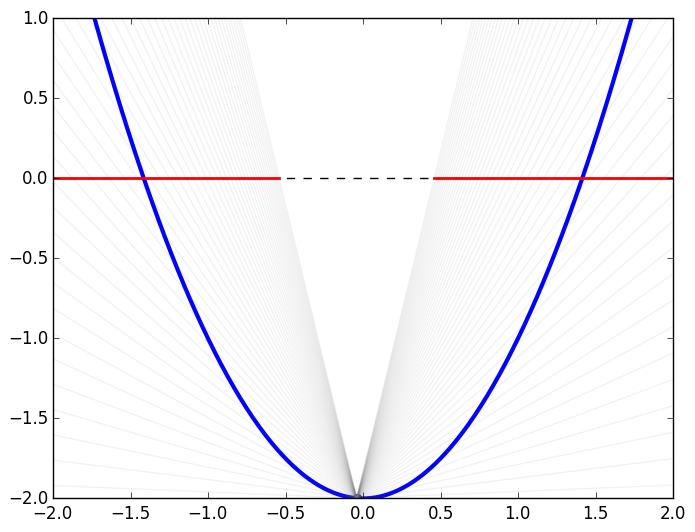

In [35]:
f(x) = x^2 - 2
X = @interval(-2, 2)

interval_newton(f, X, -2, 1)

###### Visualizing the complete interval Newton algorithm

In [71]:
X = -1..2
f(x) = x^2 - 2

interval_newton(f, X, -3, 3)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10"],Dict{Any,Any}(Pair{Any,Any}("8",8),Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("5",5),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("7",7),Pair{Any,Any}("10",10),Pair{Any,Any}("9",9),Pair{Any,Any}("3",3)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.0 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
<polyline clip-path="url(#clip02)" style="stroke:#00002d; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 21.7148,194.444 23.6293,193.193 25.5438,191.98 27.4583,190.804 29.3728,189.665 31.2873,188.563 33.2017,187.496 35.1162,186.466 37.0307,185.471 38.9452,184.511 
 40.8597,183.586 42.7742,182.695 44.6887,181.837 46.6032,181.014 48.5177,180.223 50.4322,179.466 52.3467,178.741 54.2612,178.047 56.1757,177.386 58.0902,176.755 
 60.0047,176.156 61.9192,175.587 63.8337,175.048 65.7481,174.539 67.6626,174.059 69.5771,173.608 71.4916,173.185 73.4061,172.791 75.3206,172.425 77.2351,172.086 
 79.1496,171.774 81.0641,171.489 82.9786,171.23 84.8931,170.997 86.8076,170.79 88.7221,170.607 90.6366,170.45 92.5511,170.316 94.4656,170.207 96.3801,170.122 
 98.2945,170.059 100.209,170.02 102.124,170.003 104.038,170.008 105.953,170.035 107.867,170.083 109.782,170.152 111.696,170.242 113.61,170.352 115.525,170.482 
 117.439,170.631 119.354,170.799 121.268,170.986 123.183,171.191 125.097,171.414 127.012,171.655 128.926,171.913 130.841,172.187 132.755,172.478 134.67,172.785 
 136.584,173.108 138.499,173.445 140.413,173.798 142.328,174.165 144.242,174.546 146.157,174.941 148.071,175.35 149.986,175.771 151.9,176.205 153.815,176.65 
 155.729,177.108 157.644,177.577 159.558,178.058 161.473,178.549 163.387,179.05 165.302,179.561 167.216,180.082 169.131,180.612 171.045,181.15 172.96,181.697 
 174.874,182.252 176.789,182.815 178.703,183.384 180.618,183.961 182.532,184.544 184.447,185.133 186.361,185.728 188.276,186.329 190.19,186.934 192.105,187.544 
 194.019,188.158 195.934,188.776 197.848,189.397 199.763,190.021 201.677,190.648 203.592,191.277 205.506,191.908 207.421,192.541 209.335,193.175 211.25,193.809 
 213.164,194.444 215.079,195.079 216.993,195.714 218.908,196.348 220.822,196.98 222.737,197.612 224.651,198.241 226.566,198.868 228.48,199.492 230.395,200.113 
 232.309,200.731 234.224,201.345 236.138,201.955 238.053,202.56 239.967,203.161 241.882,203.755 243.796,204.345 245.711,204.928 247.625,205.505 249.54,206.074 
 251.454,206.637 253.369,207.192 255.283,207.739 257.198,208.277 259.112,208.807 261.027,209.328 262.941,209.839 264.856,210.34 266.77,210.831 268.685,211.311 
 270.599,211.781 272.514,212.238 274.428,212.684 276.342,213.118 278.257,213.539 280.171,213.948 282.086,214.343 284,214.724 285.915,215.091 287.829,215.444 
 289.744,215.781 291.658,216.104 293.573,216.411 295.487,216.702 297.402,216.976 299.316,217.234 301.231,217.475 303.145,217.698 305.06,217.903 306.974,218.09 
 308.889,218.258 310.803,218.407 312.718,218.537 314.632,218.647 316.547,218.736 318.461,218.806 320.376,218.854 322.29,218.881 324.205,218.886 326.119,218.869 
 328.034,218.829 329.948,218.767 331.863,218.682 333.777,218.572 335.692,218.439 337.606,218.282 339.521,218.099 341.435,217.892 343.35,217.659 345.264,217.4 
 347.179,217.115 349.093,216.803 351.008,216.464 352.922,216.098 354.837,215.704 356.751,215.281 358.666,214.83 360.58,214.35 362.495,213.841 364.409,213.302 
 366.324,212.733 368.238,212.134 370.153,211.503 372.067,210.842 373.982,210.148 375.896,209.423 377.811,208.665 379.725,207.875 381.64,207.051 383.554,206.194 
 385.469,205.303 387.383,204.378 389.298,203.418 391.212,202.423 393.127,201.393 395.041,200.326 396.956,199.224 398.87,198.085 400.785,196.909 402.699,195.696 
 404.614,194.444 406.528,193.155 408.443,191.828 410.357,190.461 412.272,189.055 414.186,187.61 416.101,186.125 418.015,184.599 419.93,183.032 421.844,181.425 
 423.759,179.775 425.673,178.084 427.588,176.351 429.502,174.575 431.417,172.756 433.331,170.893 435.245,168.987 437.16,167.036 439.074,165.041 440.989,163.001 
 442.903,160.915 444.818,158.784 446.732,156.607 448.647,154.383 450.561,152.112 452.476,149.794

# Full interval Newton

In [5]:
function interval_newton_full(f, X0, ymin=-10, ymax=10)

    @manipulate for n in collect(1:20), α in linspace(0, 1, 50)


        X = X0

        # draw graph of function over interval X
        xx = X.lo:0.0001:X.hi
        p = plot(xx, map(f, xx), c="blue", lw=3, xlim=(X.lo, X.hi), ylim=(ymin, ymax), legend=:false)
        hline!([0], color="magenta", lw=3, linestyle=:dash)

        Xs = [X]
        new_Xs = []

        N1 = ∅
        N2 = ∅

        for i in 1:n-1

            for X in Xs

                x0 = (1-α)*X.lo + α*X.hi # mid(X)
                deriv = ForwardDiff.derivative(f, X)

                if 0 ∈ deriv 
                    N1 = x0 - f(@interval(x0)) / @interval(deriv.lo, -0.0)
                    N2 = x0 - f(@interval(x0)) / @interval(0.0, deriv.hi)

                    N1 = N1 ∩ X
                    N2 = N2 ∩ X

                    if !(isempty(N1))
                        push!(new_Xs, N1)
                    end

                    if !(isempty(N2))
                        push!(new_Xs, N2)
                    end


                else
                    N1 = x0 - f(@interval(x0)) / deriv
                    N1 = N1 ∩ X

                    if !(isempty(N1))
                        push!(new_Xs, N1)
                    end

                end

            end

            Xs = new_Xs
            new_Xs = []

        end

        for X in Xs
            #if n > 1

                plot!([X.lo, X.hi], [0,0], c="cyan", linewidth=4, alpha=0.3)

                m = (1-α)*X.lo + α*X.hi
                scatter!([m], [0], c="green")
                scatter!([m], [f(m)], c="red")
            plot!([m, m], [0, f(m)], c="green", ls=:dash)
            #end

            x0 = (1-α)*X.lo + α*X.hi # mid(X)
            deriv = ForwardDiff.derivative(f, X)

             # draw initial point
            y0 = f(x0)
            scatter!([x0], [y0], c="red")

            # draw cone
            for m in linspace(deriv.lo, deriv.hi, 100)
                plot!([X.lo, X.hi], [ y0 + m*(x-x0) for x in [X.lo, X.hi]], color="gray", alpha=0.2)
            end

            if 0 ∈ deriv
                N1 = x0 - f(@interval(x0)) / @interval(deriv.lo, -0.0)
                N2 = x0 - f(@interval(x0)) / @interval(0.0, deriv.hi)

                N1 = N1 ∩ X
                N2 = N2 ∩ X
                
                plot!([N1.lo, N1.hi], [0,0], c="red", linewidth=4, alpha=0.8)
                plot!([N2.lo, N2.hi], [0,0], c="red", linewidth=4, alpha=0.8)

            else
                N1 = x0 - f(@interval(x0)) / deriv
                N1 = N1 ∩ X

                plot!([N1.lo, N1.hi], [0,0], c="red", linewidth=4, alpha=0.8)
            end
        end

        #text(0, 5, "$(length(Xs))")

        p

    end


    
end

interval_newton_full (generic function with 3 methods)

In [9]:
xx = -1:0.01:10
f(x) = x^2 - 2
x0 = 8

interval_newton_full(x->f(x), 0..4, -10, 26)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
 20 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 30.6037,300.282 30.6178,300.282 30.6319,300.282 30.6461,300.282 30.6602,300.282 30.6744,300.282 30.6885,300.282 30.7026,300.282 30.7168,300.282 30.7309,300.282 
 30.745,300.282 30.7592,300.282 30.7733,300.282 30.7874,300.282 30.8016,300.282 30.8157,300.282 30.8299,300.282 30.844,300.282 30.8581,300.282 30.8723,300.282 
 30.8864,300.282 30.9005,300.282 30.9147,300.282 30.9288,300.282 30.943,300.282 30.9571,300.282 30.9712,300.282 30.9854,300.282 30.9995,300.282 31.0136,300.282 
 31.0278,300.282 31.0419,300.282 31.056,300.282 31.0702,300.282 31.0843,300.282 31.0985,300.282 31.1126,300.282 31.1267,300.282 31.1409,300.282 31.155,300.282 
 31.1691,300.282 31.1833,300.282 31.1974,300.282 31.2115,300.282 31.2257,300.282 31.2398,300.282 31.254,300.282 31.2681,300.282 31.2822,300.282 31.2964,300.282 
 31.3105,300.282 31.3246,300.282 31.3388,300.282 31.3529,300.282 31.367,300.282 31.3812,300.282 31.3953,300.282 31.4095,300.282 31.4236,300.282 31.4377,300.282 
 31.4519,300.282 31.466,300.282 31.4801,300.282 31.4943,300.281 31.5084,300.281 31.5225,300.281 31.5367,300.281 31.5508,300.281 31.565,300.281 31.5791,300.281 
 31.5932,300.281 31.6074,300.281 31.6215,300.281 31.6356,300.281 31.6498,300.281 31.6639,300.281 31.678,300.281 31.6922,300.281 31.7063,300.281 31.7205,300.281 
 31.7346,300.281 31.7487,300.281 31.7629,300.281 31.777,300.281 31.7911,300.281 31.8053,300.281 31.8194,300.281 31.8335,300.281 31.8477,300.281 31.8618,300.281 
 31.876,300.281 31.8901,300.281 31.9042,300.281 31.9184,300.281 31.9325,300.281 31.9466,300.281 31.9608,300.281 31.9749,300.281 31.989,300.281 32.0032,300.281 
 32.0173,300.281 32.0315,300.281 32.0456,300.281 32.0597,300.281 32.0739,300.281 32.088,300.281 32.1021,300.281 32.1163,300.281 32.1304,300.281 32.1446,300.281 
 32.1587,300.281 32.1728,300.281 32.187,300.281 32.2011,300.281 32.2152,300.281 32.2294,300.281 32.2435,300.28 32.2576,300.28 32.2718,300.28 32.2859,300.28 
 32.3001,300.28 32.3142,300.28 32.3283,300.28 32.3425,300.28 32.3566,300.28 32.3707,300.28 32.3849,300.28 32.399,300.28 32.4131,300.28 32.4273,300.28 
 32.4414,300.28 32.4556,300.28 32.4697,300.28 32.4838,300.28 32.498,300.28 32.5121,300.28 32.5262,300.28 32.5404,300.28 32.5545,300.28 32.5686,300.28 
 32.5828,300.28 32.5969,300.28 32.6111,300.28 32.6252,300.28 32.6393,300.28 32.6535,300.28 32.6676,300.28 32.6817,300.28 32.6959,300.28 32.71,300.28 
 32.7241,300.28 32.7383,300.279 32.7524,300.279 32.7666,300.279 32.7807,300.279 32.7948,300.279 32.809,300.279 32.8231,300.279 32.8372,300.279 32.8514,300.279 
 32.8655,300.279 32.8796,300.279 32.8938,300.279 32.9079,300.279 32.9221,300.279 32.9362,300.279 32.9503,300.279 32.9645,300.279 32.9786,300.279 32.9927,300.279 
 33.0069,300.279 33.021,300.279 33.0351,300.279 33.0493,300.279 33.0634,300.279 33.0776,300.279 33.0917,300.279 33.1058,300.279 33.12,300.279 33.1341,300.279 
 33.1482,300.278 33.1624,300.278 33.1765,300.278 33.1907,300.278 33.2048,300.278 33.2189,300.278 33.2331,300.278 33.2472,300.278 33.2613,300.278 33.2755,300.278 
 33.2896,300.278 33.3037,300.278 33.3179,300.278 33.332,300.278 33.3462,300.278 33.3603,300.278 33.3744,300.278 33.3886,300.278 33.4027,300.278 33.4168,300.278 
 33.431,300.278 33.4451,300.278 33.4592,300.278 33.4734,300.278 33.4875,300.278 33.5017,300.277 33.5158,300.277 33.5299,300.277 33.5441,300.277 33.5582,300.277 
 33.5723,300.277 33.5865,300.277 33.6006,300.277 33.6147,300.277 33.6289,300.277 33.643,300.277 33.6572,300.277 33.6713,300.277 33.6854,300.277 33.6996,300.277 
 33.7137,300.277 33.7278,300.277 33.742,300.277 33.7561,300.277 33.7702,300.277 33.7844,300.277 33.7985,300.277 33.8127,300.276 33.8268,300.276 33.8409,300.276 
 33.8551,300.276 33.8692,300.27

What happens if there is a 0 in the derivative?

In [10]:
interval_newton_full(x->x^2 - 2, -3..5, -10, 10)


Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 30.6037,61.0892 30.6107,61.1007 30.6178,61.1121 30.6249,61.1235 30.6319,61.135 30.639,61.1464 30.6461,61.1578 30.6532,61.1692 30.6602,61.1807 30.6673,61.1921 
 30.6744,61.2035 30.6814,61.215 30.6885,61.2264 30.6956,61.2378 30.7026,61.2492 30.7097,61.2607 30.7168,61.2721 30.7238,61.2835 30.7309,61.2949 30.738,61.3063 
 30.745,61.3178 30.7521,61.3292 30.7592,61.3406 30.7662,61.352 30.7733,61.3635 30.7804,61.3749 30.7874,61.3863 30.7945,61.3977 30.8016,61.4091 30.8087,61.4206 
 30.8157,61.432 30.8228,61.4434 30.8299,61.4548 30.8369,61.4662 30.844,61.4777 30.8511,61.4891 30.8581,61.5005 30.8652,61.5119 30.8723,61.5233 30.8793,61.5347 
 30.8864,61.5462 30.8935,61.5576 30.9005,61.569 30.9076,61.5804 30.9147,61.5918 30.9217,61.6032 30.9288,61.6146 30.9359,61.626 30.943,61.6375 30.95,61.6489 
 30.9571,61.6603 30.9642,61.6717 30.9712,61.6831 30.9783,61.6945 30.9854,61.7059 30.9924,61.7173 30.9995,61.7287 31.0066,61.7402 31.0136,61.7516 31.0207,61.763 
 31.0278,61.7744 31.0348,61.7858 31.0419,61.7972 31.049,61.8086 31.056,61.82 31.0631,61.8314 31.0702,61.8428 31.0772,61.8542 31.0843,61.8656 31.0914,61.877 
 31.0985,61.8884 31.1055,61.8998 31.1126,61.9112 31.1197,61.9226 31.1267,61.934 31.1338,61.9455 31.1409,61.9569 31.1479,61.9683 31.155,61.9797 31.1621,61.9911 
 31.1691,62.0025 31.1762,62.0139 31.1833,62.0253 31.1903,62.0367 31.1974,62.0481 31.2045,62.0595 31.2115,62.0708 31.2186,62.0822 31.2257,62.0936 31.2327,62.105 
 31.2398,62.1164 31.2469,62.1278 31.254,62.1392 31.261,62.1506 31.2681,62.162 31.2752,62.1734 31.2822,62.1848 31.2893,62.1962 31.2964,62.2076 31.3034,62.219 
 31.3105,62.2304 31.3176,62.2418 31.3246,62.2532 31.3317,62.2646 31.3388,62.2759 31.3458,62.2873 31.3529,62.2987 31.36,62.3101 31.367,62.3215 31.3741,62.3329 
 31.3812,62.3443 31.3882,62.3557 31.3953,62.3671 31.4024,62.3784 31.4095,62.3898 31.4165,62.4012 31.4236,62.4126 31.4307,62.424 31.4377,62.4354 31.4448,62.4468 
 31.4519,62.4581 31.4589,62.4695 31.466,62.4809 31.4731,62.4923 31.4801,62.5037 31.4872,62.5151 31.4943,62.5265 31.5013,62.5378 31.5084,62.5492 31.5155,62.5606 
 31.5225,62.572 31.5296,62.5834 31.5367,62.5947 31.5438,62.6061 31.5508,62.6175 31.5579,62.6289 31.565,62.6403 31.572,62.6516 31.5791,62.663 31.5862,62.6744 
 31.5932,62.6858 31.6003,62.6971 31.6074,62.7085 31.6144,62.7199 31.6215,62.7313 31.6286,62.7426 31.6356,62.754 31.6427,62.7654 31.6498,62.7768 31.6568,62.7881 
 31.6639,62.7995 31.671,62.8109 31.678,62.8223 31.6851,62.8336 31.6922,62.845 31.6993,62.8564 31.7063,62.8678 31.7134,62.8791 31.7205,62.8905 31.7275,62.9019 
 31.7346,62.9132 31.7417,62.9246 31.7487,62.936 31.7558,62.9473 31.7629,62.9587 31.7699,62.9701 31.777,62.9814 31.7841,62.9928 31.7911,63.0042 31.7982,63.0155 
 31.8053,63.0269 31.8123,63.0383 31.8194,63.0496 31.8265,63.061 31.8335,63.0724 31.8406,63.0837 31.8477,63.0951 31.8548,63.1065 31.8618,63.1178 31.8689,63.1292 
 31.876,63.1405 31.883,63.1519 31.8901,63.1633 31.8972,63.1746 31.9042,63.186 31.9113,63.1974 31.9184,63.2087 31.9254,63.2201 31.9325,63.2314 31.9396,63.2428 
 31.9466,63.2541 31.9537,63.2655 31.9608,63.2769 31.9678,63.2882 31.9749,63.2996 31.982,63.3109 31.989,63.3223 31.9961,63.3336 32.0032,63.345 32.0103,63.3564 
 32.0173,63.3677 32.0244,63.3791 32.0315,63.3904 32.0385,63.4018 32.0456,63.4131 32.0527,63.4245 32.0597,63.4358 32.0668,63.4472 32.0739,63.4585 32.0809,63.4699 
 32.088,63.4812 32.0951,63.4926 32.1021,63.5039 32.1092,63.5153 32.1163,63.5266 32.1233,63.538 32.1304,63.5493 32.1375,63.5607 32.1446,63.572 32.1516,63.5834 
 32.1587,63.5947 32.1658,63.6061 32.1728,63.6174 32.1799,63.6288 32.187,63.6401 32.194,63.6514 32.2011,63.6628 32.2082,63.6741 32.2152,63.6855 32.2223,63.6968 
 32.2294,63.7

In [102]:
interval_newton_full(x->x^3 - x, @interval(-3, 2), -10, 10)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 30.6037,651.662 30.615,651.613 30.6263,651.563 30.6376,651.514 30.6489,651.464 30.6602,651.415 30.6715,651.365 30.6828,651.316 30.6941,651.266 30.7055,651.217 
 30.7168,651.167 30.7281,651.118 30.7394,651.068 30.7507,651.019 30.762,650.969 30.7733,650.92 30.7846,650.87 30.7959,650.821 30.8072,650.771 30.8185,650.722 
 30.8299,650.672 30.8412,650.623 30.8525,650.573 30.8638,650.524 30.8751,650.475 30.8864,650.425 30.8977,650.376 30.909,650.326 30.9203,650.277 30.9316,650.227 
 30.943,650.178 30.9543,650.128 30.9656,650.079 30.9769,650.03 30.9882,649.98 30.9995,649.931 31.0108,649.881 31.0221,649.832 31.0334,649.783 31.0447,649.733 
 31.056,649.684 31.0674,649.634 31.0787,649.585 31.09,649.536 31.1013,649.486 31.1126,649.437 31.1239,649.387 31.1352,649.338 31.1465,649.289 31.1578,649.239 
 31.1691,649.19 31.1804,649.141 31.1918,649.091 31.2031,649.042 31.2144,648.993 31.2257,648.943 31.237,648.894 31.2483,648.845 31.2596,648.795 31.2709,648.746 
 31.2822,648.697 31.2935,648.647 31.3048,648.598 31.3162,648.549 31.3275,648.499 31.3388,648.45 31.3501,648.401 31.3614,648.351 31.3727,648.302 31.384,648.253 
 31.3953,648.203 31.4066,648.154 31.4179,648.105 31.4292,648.056 31.4406,648.006 31.4519,647.957 31.4632,647.908 31.4745,647.858 31.4858,647.809 31.4971,647.76 
 31.5084,647.711 31.5197,647.661 31.531,647.612 31.5423,647.563 31.5536,647.514 31.565,647.464 31.5763,647.415 31.5876,647.366 31.5989,647.317 31.6102,647.268 
 31.6215,647.218 31.6328,647.169 31.6441,647.12 31.6554,647.071 31.6667,647.021 31.678,646.972 31.6894,646.923 31.7007,646.874 31.712,646.825 31.7233,646.775 
 31.7346,646.726 31.7459,646.677 31.7572,646.628 31.7685,646.579 31.7798,646.529 31.7911,646.48 31.8024,646.431 31.8138,646.382 31.8251,646.333 31.8364,646.284 
 31.8477,646.235 31.859,646.185 31.8703,646.136 31.8816,646.087 31.8929,646.038 31.9042,645.989 31.9155,645.94 31.9268,645.89 31.9382,645.841 31.9495,645.792 
 31.9608,645.743 31.9721,645.694 31.9834,645.645 31.9947,645.596 32.006,645.547 32.0173,645.498 32.0286,645.448 32.0399,645.399 32.0513,645.35 32.0626,645.301 
 32.0739,645.252 32.0852,645.203 32.0965,645.154 32.1078,645.105 32.1191,645.056 32.1304,645.007 32.1417,644.958 32.153,644.909 32.1643,644.859 32.1757,644.81 
 32.187,644.761 32.1983,644.712 32.2096,644.663 32.2209,644.614 32.2322,644.565 32.2435,644.516 32.2548,644.467 32.2661,644.418 32.2774,644.369 32.2887,644.32 
 32.3001,644.271 32.3114,644.222 32.3227,644.173 32.334,644.124 32.3453,644.075 32.3566,644.026 32.3679,643.977 32.3792,643.928 32.3905,643.879 32.4018,643.83 
 32.4131,643.781 32.4245,643.732 32.4358,643.683 32.4471,643.634 32.4584,643.585 32.4697,643.536 32.481,643.487 32.4923,643.438 32.5036,643.389 32.5149,643.34 
 32.5262,643.291 32.5375,643.242 32.5489,643.193 32.5602,643.144 32.5715,643.096 32.5828,643.047 32.5941,642.998 32.6054,642.949 32.6167,642.9 32.628,642.851 
 32.6393,642.802 32.6506,642.753 32.6619,642.704 32.6733,642.655 32.6846,642.606 32.6959,642.557 32.7072,642.509 32.7185,642.46 32.7298,642.411 32.7411,642.362 
 32.7524,642.313 32.7637,642.264 32.775,642.215 32.7863,642.166 32.7977,642.117 32.809,642.069 32.8203,642.02 32.8316,641.971 32.8429,641.922 32.8542,641.873 
 32.8655,641.824 32.8768,641.775 32.8881,641.727 32.8994,641.678 32.9107,641.629 32.9221,641.58 32.9334,641.531 32.9447,641.482 32.956,641.434 32.9673,641.385 
 32.9786,641.336 32.9899,641.287 33.0012,641.238 33.0125,641.19 33.0238,641.141 33.0351,641.092 33.0465,641.043 33.0578,640.994 33.0691,640.946 33.0804,640.897 
 33.0917,640.848 33.103,640.799 33.1143,640.75 33.1256,640.702 33.1369,640.653 33.1482,640.604 33.1596,640.555 33.1709,640.507 33.1822,640.458 33.193

In [11]:
interval_newton_full(x->sin(1/x), @interval(0.01, 0.1), -1,1 )

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.025 
 
 
 0.050 
 
 
 0.075 
 
 
 0.100 
 
 
 -1.0 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 39.4926,290.911 40.111,384.716 40.7294,309.713 41.3478,137.783 41.9662,14.5442 42.5846,35.1423 43.203,176.972 43.8214,329.75 44.4399,384.274 45.0583,307.745 
 45.6767,157.139 46.2951,32.5019 46.9135,9.84418 47.5319,97.9754 48.1503,240.708 48.7687,355.577 49.3871,381.634 50.0056,309.294 50.624,179.744 51.2424,59.1989 
 51.8608,4.5636 52.4792,38.0314 53.0976,140.735 53.716,265.213 54.3344,358.376 54.9529,383.788 55.5713,334.415 56.1897,232.356 56.8081,117.666 57.4265,32.068 
 58.0449,4.13803 58.6633,40.8626 59.2817,127.449 59.9001,234.205 60.5186,327.249 61.137,379.186 61.7554,376.555 62.3738,322.347 62.9922,233.624 63.6106,135.57 
 64.229,54.1128 64.8474,9.22441 65.4659,10.5026 66.0843,55.8032 66.7027,132.819 67.3211,222.823 67.9395,305.428 68.5579,363.162 69.1763,384.9 69.7947,367.597 
 70.4131,316.182 71.0316,241.894 71.65,159.594 72.2684,84.6901 72.8868,30.3064 73.5052,5.16233 74.1236,12.4505 74.742,49.7701 75.3604,109.991 75.9788,182.787 
 76.5973,256.511 77.2157,320.07 77.8341,364.524 78.4525,384.204 79.0709,377.243 79.6893,345.526 80.3077,294.134 80.9261,230.42 81.5446,162.881 82.163,100.006 
 82.7814,49.2365 83.3998,16.1537 84.0182,3.97538 84.6366,13.3695 85.255,42.5772 85.8734,87.7913 86.4918,143.719 87.1103,204.25 87.7287,263.138 88.3471,314.641 
 88.9655,354.038 89.5839,378.012 90.2023,384.849 90.8207,374.483 91.4391,348.375 92.0575,309.278 92.676,260.907 93.2944,207.553 93.9128,153.691 94.5312,103.609 
 95.1496,61.0758 95.768,29.094 96.3864,9.7214 97.0048,3.98655 97.6233,11.8857 98.2417,32.4546 98.8601,63.9022 99.4785,103.79 100.097,149.24 100.715,197.155 
 101.334,244.429 101.952,288.15 102.571,325.763 103.189,355.202 103.807,374.984 104.426,384.251 105.044,382.784 105.663,370.97 106.281,349.742 106.899,320.491 
 107.518,284.968 108.136,245.162 108.755,203.19 109.373,161.176 109.991,121.15 110.61,84.956 111.228,54.1728 111.847,30.0594 112.465,13.5163 113.084,5.06774 
 113.702,4.86134 114.32,12.6852 114.939,27.9989 115.557,49.9764 116.176,77.5569 116.794,109.503 117.412,144.459 118.031,181.012 118.649,217.751 119.268,253.317 
 119.886,286.453 120.504,316.04 121.123,341.136 121.741,360.991 122.36,375.067 122.978,383.043 123.597,384.81 124.215,380.467 124.833,370.305 125.452,354.782 
 126.07,334.506 126.689,310.202 127.307,282.689 127.925,252.843 128.544,221.576 129.162,189.801 129.781,158.41 130.399,128.248 131.017,100.095 131.636,74.6455 
 132.254,52.4948 132.873,34.1311 133.491,19.9265 134.11,10.1351 134.728,4.892 135.346,4.21699 135.965,8.01998 136.583,16.1091 137.202,28.2004 137.82,43.9298 
 138.438,62.8651 139.057,84.5195 139.675,108.366 140.294,133.848 140.912,160.399 141.53,187.447 142.149,214.435 142.767,240.825 143.386,266.111 144.004,289.829 
 144.623,311.56 145.241,330.939 145.859,347.659 146.478,361.473 147.096,372.195 147.715,379.701 148.333,383.931 148.951,384.881 149.57,382.606 150.188,377.212 
 150.807,368.855 151.425,357.734 152.043,344.085 152.662,328.176 153.28,310.305 153.899,290.785 154.517,269.948 155.136,248.133 155.754,225.68 156.372,202.93 
 156.991,180.215 157.609,157.856 158.228,136.157 158.846,115.404 159.464,95.859 160.083,77.7594 160.701,61.3155 161.32,46.7085 161.938,34.0894 162.556,23.5788 
 163.175,15.2666 163.793,9.21183 164.412,5.4439 165.03,3.96318 165.649,4.74242 166.267,7.72833 166.885,12.8434 167.504,19.9878 168.122,29.0419 168.741,39.8679 
 169.359,52.3129 169.977,66.2108 170.596,81.3852 171.214,97.6512 171.833,114.818 172.451,132.693 173.069,151.079 173.688,169.783 174.306,188.613 174.925,207.382 
 175.543,225.91 176.162,244.024 176.78,261.56 177.398,278.366 178.017,294.301 178.635,309.235 179.254,323.053 179.872,335.652 180.49,346.945 181.109,356.856 
 

In [12]:
interval_newton_full(x->x^5 - x^4 +2x^2 - x, @interval(-1.5, 1.5), -4,4 )

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -1.5 
 
 
 -1.0 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 -4 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 4 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 21.7148,511.461 21.7339,511.309 21.7531,511.158 21.7722,511.006 21.7914,510.855 21.8105,510.704 21.8297,510.552 21.8488,510.401 21.8679,510.25 21.8871,510.099 
 21.9062,509.948 21.9254,509.797 21.9445,509.646 21.9637,509.495 21.9828,509.344 22.002,509.193 22.0211,509.042 22.0402,508.891 22.0594,508.74 22.0785,508.59 
 22.0977,508.439 22.1168,508.288 22.136,508.138 22.1551,507.987 22.1743,507.837 22.1934,507.686 22.2126,507.536 22.2317,507.386 22.2508,507.235 22.27,507.085 
 22.2891,506.935 22.3083,506.784 22.3274,506.634 22.3466,506.484 22.3657,506.334 22.3849,506.184 22.404,506.034 22.4231,505.884 22.4423,505.734 22.4614,505.584 
 22.4806,505.435 22.4997,505.285 22.5189,505.135 22.538,504.985 22.5572,504.836 22.5763,504.686 22.5955,504.537 22.6146,504.387 22.6337,504.238 22.6529,504.088 
 22.672,503.939 22.6912,503.789 22.7103,503.64 22.7295,503.491 22.7486,503.342 22.7678,503.192 22.7869,503.043 22.806,502.894 22.8252,502.745 22.8443,502.596 
 22.8635,502.447 22.8826,502.298 22.9018,502.149 22.9209,502.001 22.9401,501.852 22.9592,501.703 22.9784,501.554 22.9975,501.406 23.0166,501.257 23.0358,501.108 
 23.0549,500.96 23.0741,500.811 23.0932,500.663 23.1124,500.515 23.1315,500.366 23.1507,500.218 23.1698,500.07 23.1889,499.921 23.2081,499.773 23.2272,499.625 
 23.2464,499.477 23.2655,499.329 23.2847,499.181 23.3038,499.033 23.323,498.885 23.3421,498.737 23.3613,498.589 23.3804,498.441 23.3995,498.294 23.4187,498.146 
 23.4378,497.998 23.457,497.85 23.4761,497.703 23.4953,497.555 23.5144,497.408 23.5336,497.26 23.5527,497.113 23.5718,496.966 23.591,496.818 23.6101,496.671 
 23.6293,496.524 23.6484,496.376 23.6676,496.229 23.6867,496.082 23.7059,495.935 23.725,495.788 23.7441,495.641 23.7633,495.494 23.7824,495.347 23.8016,495.2 
 23.8207,495.053 23.8399,494.906 23.859,494.76 23.8782,494.613 23.8973,494.466 23.9165,494.32 23.9356,494.173 23.9547,494.027 23.9739,493.88 23.993,493.734 
 24.0122,493.587 24.0313,493.441 24.0505,493.294 24.0696,493.148 24.0888,493.002 24.1079,492.856 24.127,492.71 24.1462,492.563 24.1653,492.417 24.1845,492.271 
 24.2036,492.125 24.2228,491.979 24.2419,491.833 24.2611,491.688 24.2802,491.542 24.2994,491.396 24.3185,491.25 24.3376,491.104 24.3568,490.959 24.3759,490.813 
 24.3951,490.668 24.4142,490.522 24.4334,490.377 24.4525,490.231 24.4717,490.086 24.4908,489.94 24.5099,489.795 24.5291,489.65 24.5482,489.504 24.5674,489.359 
 24.5865,489.214 24.6057,489.069 24.6248,488.924 24.644,488.779 24.6631,488.634 24.6823,488.489 24.7014,488.344 24.7205,488.199 24.7397,488.054 24.7588,487.91 
 24.778,487.765 24.7971,487.62 24.8163,487.475 24.8354,487.331 24.8546,487.186 24.8737,487.042 24.8928,486.897 24.912,486.753 24.9311,486.608 24.9503,486.464 
 24.9694,486.32 24.9886,486.175 25.0077,486.031 25.0269,485.887 25.046,485.743 25.0652,485.599 25.0843,485.455 25.1034,485.311 25.1226,485.167 25.1417,485.023 
 25.1609,484.879 25.18,484.735 25.1992,484.591 25.2183,484.447 25.2375,484.304 25.2566,484.16 25.2757,484.016 25.2949,483.873 25.314,483.729 25.3332,483.585 
 25.3523,483.442 25.3715,483.299 25.3906,483.155 25.4098,483.012 25.4289,482.868 25.448,482.725 25.4672,482.582 25.4863,482.439 25.5055,482.296 25.5246,482.152 
 25.5438,482.009 25.5629,481.866 25.5821,481.723 25.6012,481.58 25.6204,481.438 25.6395,481.295 25.6586,481.152 25.6778,481.009 25.6969,480.866 25.7161,480.724 
 25.7352,480.581 25.7544,480.438 25.7735,480.296 25.7927,480.153 25.8118,480.011 25.8309,479.868 25.8501,479.726 25.8692,479.583 25.8884,479.441 25.9075,479.299 
 25.9267,479.157 25.9458,479.014 25.965,478.872 25.9841,478.73 26.0033,478.588 26.0224,478.446 26.0415,478.304 26.0607,478.16

In [10]:
interval_newton_full(x->1/(x-1)-2, -5..5)

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"n",1,"1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}(Pair{Any,Any}("4",4),Pair{Any,Any}("1",1),Pair{Any,Any}("12",12),Pair{Any,Any}("20",20),Pair{Any,Any}("2",2),Pair{Any,Any}("6",6),Pair{Any,Any}("11",11),Pair{Any,Any}("13",13),Pair{Any,Any}("5",5),Pair{Any,Any}("15",15)…)),Any[],Any[])

Interact.Slider{Float64}(Signal{Float64}(0.4897959183673469, nactions=0),"α",0.4897959183673469,linspace(0.0,1.0,50),".3f",true)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -5.0 
 
 
 -2.5 
 
 
 0.0 
 
 
 2.5 
 
 
 5.0 
 
 
 -10 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
<polyline clip-path="url(#clip02)" style="stroke:#0000ff; stroke-width:2.4; stroke-opacity:1; fill:none" points="
 30.6037,235.721 30.6093,235.721 30.615,235.721 30.6206,235.721 30.6263,235.721 30.6319,235.721 30.6376,235.721 30.6433,235.721 30.6489,235.721 30.6546,235.722 
 30.6602,235.722 30.6659,235.722 30.6715,235.722 30.6772,235.722 30.6828,235.722 30.6885,235.722 30.6941,235.722 30.6998,235.722 30.7055,235.722 30.7111,235.722 
 30.7168,235.722 30.7224,235.722 30.7281,235.722 30.7337,235.722 30.7394,235.722 30.745,235.722 30.7507,235.722 30.7563,235.722 30.762,235.723 30.7677,235.723 
 30.7733,235.723 30.779,235.723 30.7846,235.723 30.7903,235.723 30.7959,235.723 30.8016,235.723 30.8072,235.723 30.8129,235.723 30.8185,235.723 30.8242,235.723 
 30.8299,235.723 30.8355,235.723 30.8412,235.723 30.8468,235.723 30.8525,235.723 30.8581,235.723 30.8638,235.723 30.8694,235.724 30.8751,235.724 30.8807,235.724 
 30.8864,235.724 30.8921,235.724 30.8977,235.724 30.9034,235.724 30.909,235.724 30.9147,235.724 30.9203,235.724 30.926,235.724 30.9316,235.724 30.9373,235.724 
 30.943,235.724 30.9486,235.724 30.9543,235.724 30.9599,235.724 30.9656,235.724 30.9712,235.724 30.9769,235.725 30.9825,235.725 30.9882,235.725 30.9938,235.725 
 30.9995,235.725 31.0052,235.725 31.0108,235.725 31.0165,235.725 31.0221,235.725 31.0278,235.725 31.0334,235.725 31.0391,235.725 31.0447,235.725 31.0504,235.725 
 31.056,235.725 31.0617,235.725 31.0674,235.725 31.073,235.725 31.0787,235.726 31.0843,235.726 31.09,235.726 31.0956,235.726 31.1013,235.726 31.1069,235.726 
 31.1126,235.726 31.1182,235.726 31.1239,235.726 31.1296,235.726 31.1352,235.726 31.1409,235.726 31.1465,235.726 31.1522,235.726 31.1578,235.726 31.1635,235.726 
 31.1691,235.726 31.1748,235.726 31.1804,235.726 31.1861,235.727 31.1918,235.727 31.1974,235.727 31.2031,235.727 31.2087,235.727 31.2144,235.727 31.22,235.727 
 31.2257,235.727 31.2313,235.727 31.237,235.727 31.2426,235.727 31.2483,235.727 31.254,235.727 31.2596,235.727 31.2653,235.727 31.2709,235.727 31.2766,235.727 
 31.2822,235.727 31.2879,235.727 31.2935,235.728 31.2992,235.728 31.3048,235.728 31.3105,235.728 31.3162,235.728 31.3218,235.728 31.3275,235.728 31.3331,235.728 
 31.3388,235.728 31.3444,235.728 31.3501,235.728 31.3557,235.728 31.3614,235.728 31.367,235.728 31.3727,235.728 31.3784,235.728 31.384,235.728 31.3897,235.728 
 31.3953,235.728 31.401,235.729 31.4066,235.729 31.4123,235.729 31.4179,235.729 31.4236,235.729 31.4292,235.729 31.4349,235.729 31.4406,235.729 31.4462,235.729 
 31.4519,235.729 31.4575,235.729 31.4632,235.729 31.4688,235.729 31.4745,235.729 31.4801,235.729 31.4858,235.729 31.4914,235.729 31.4971,235.729 31.5028,235.729 
 31.5084,235.73 31.5141,235.73 31.5197,235.73 31.5254,235.73 31.531,235.73 31.5367,235.73 31.5423,235.73 31.548,235.73 31.5536,235.73 31.5593,235.73 
 31.565,235.73 31.5706,235.73 31.5763,235.73 31.5819,235.73 31.5876,235.73 31.5932,235.73 31.5989,235.73 31.6045,235.73 31.6102,235.731 31.6158,235.731 
 31.6215,235.731 31.6272,235.731 31.6328,235.731 31.6385,235.731 31.6441,235.731 31.6498,235.731 31.6554,235.731 31.6611,235.731 31.6667,235.731 31.6724,235.731 
 31.678,235.731 31.6837,235.731 31.6894,235.731 31.695,235.731 31.7007,235.731 31.7063,235.731 31.712,235.731 31.7176,235.732 31.7233,235.732 31.7289,235.732 
 31.7346,235.732 31.7402,235.732 31.7459,235.732 31.7516,235.732 31.7572,235.732 31.7629,235.732 31.7685,235.732 31.7742,235.732 31.7798,235.732 31.7855,235.732 
 31.7911,235.732 31.7968,235.732 31.8024,235.732 31.8081,235.732 31.8138,235.732 31.8194,235.732 31.8251,235.733 31.8307,235.733 31.8364,235.733 31.842,235.733 
 31.8477,235.733 31.8533,235.733 31.859,235.733 31.8646,235.733 31.8703,235.733 31.876,235.733 31.8816,235.733 31.8873,235.733 31.8929,235.733 31.8986